# Week 13 - Artificial Neural Networks (Part 2)

Today in the lecture we revised and learned the following:
- perceptron: single-layer (focus of last workshop)
- introducing activation functions and Adaline (Adaptive Linear Neuron)
- gradient descent and stochastic gradient descent
- multi-layer preceptron: combination of Adaline
- overview of deep learning for image processing

As the last workshop focused on the _perceptron_, this one is going to focus on the next two "steps" in constructing a neural network: **activation functions** and **multi-layer perceptron**. An artificial neural network is simply a multi-layer perceptron, using Adaline perceptrons (with a choice of differentiable activation function) as units.

This workshop will also be a mix of going through some implementations together, and **two (2) exercises** for you to solve.

### Activation functions

Single-layer perceptrons were not able to succesfully classify when classes were not _linearly separable_. To design a classifier which can cope with such classes, last workshop we looked at the _kernel trick_. Another way is to chain single-layer perceptrons into a network consisting of **inputs**, one or more **hidden layers** and the **output layer**.

In order for the **multi-layer perceptron** to learn, we rely on stochastic gradient descent, which requires a **differentiable activation function**.



First let's revise how to use `sklearn` implementation of multi-layer perceptron, on a smiple linearly separable dataset.

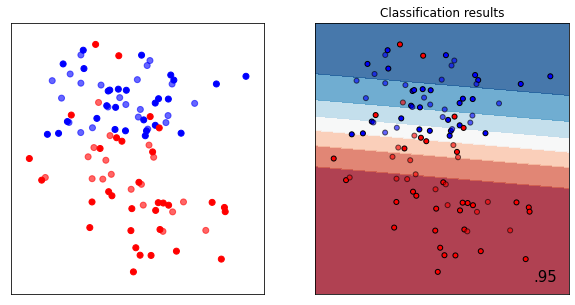

In [1]:
# modified from https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier

# make linearly separable classes, slightly shuffled
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

# just use 'identity' in this example
activation_function = 'identity'

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)


# initialise the classifier
clf = MLPClassifier(solver='lbfgs', alpha=0, random_state=1, max_iter=2000,
        early_stopping=True, hidden_layer_sizes=[100, 100],
        activation = activation_function)

# fit the data, examine error
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

# below is used for plotting the train/test data and the results

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#ax[0] = plt.subplot(len(datasets), len(classifiers) + 1, i)
# Plot the training points
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax[0].set_xlim(xx.min(), xx.max())
ax[0].set_ylim(yy.min(), yy.max())
ax[0].set_xticks(())
ax[0].set_yticks(())

if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax[1].contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='black', s=25)
# and testing points
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           alpha=0.6, edgecolors='black', s=25)

ax[1].set_xlim(xx.min(), xx.max())
ax[1].set_ylim(yy.min(), yy.max())
ax[1].set_xticks(())
ax[1].set_yticks(())
#ax[1].set_title(name)
ax[1].text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
        size=15, horizontalalignment='right')
    
ax[1].set_title('Classification results'.format(activation_function))
    
plt.show()

### Excercise 1

Let's examine the influence of the activation function when the datset used is not linearly separable. Below sinipped of code runs a multi-layer perceptron with two hidden layers of size (100, 100) on the 'moon' and 'circle' data shown. The learning is done with an identity **activation function**.

Try using different choices of activation functions. Options include:
- `identity`
\begin{equation*}
f_{id}(x) = x
\end{equation*}
- `tanh`
\begin{equation*}
f_{tanh}(x) = \tanh{x}
\end{equation*}
- `logistic` (sigmoid -- used in lecture)
\begin{equation*}
f_{\sigma}(x) = \frac{1}{1+ e^{-x}}
\end{equation*}
- `relu` (rectified linear unit -- deep learning)
\begin{equation*}
f_{relu}(x) = \max(0, x)
\end{equation*}

Look at the results of the classification. Think about the following:
- Are there difference in the quality of the results?
- Are all the activations able to learn the "correct" classification?
- Which activation functions is the best/worst?

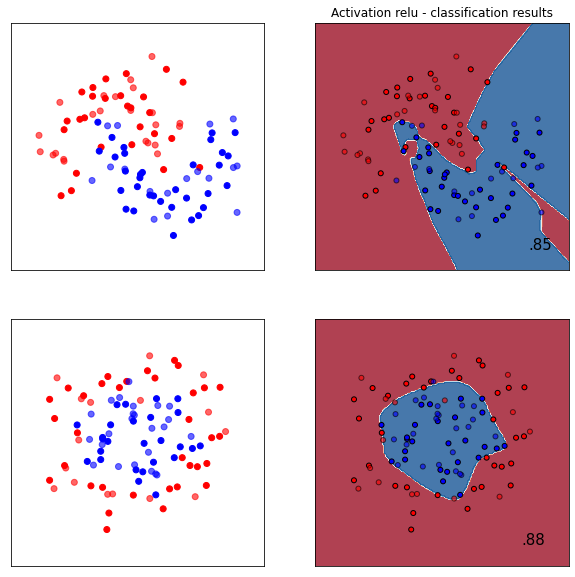

In [2]:
# modified from https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py

from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier

datasets = [make_moons(noise=0.3, random_state = 0),
           make_circles(noise=0.2, factor = 0.5, random_state = 1)]


##################################################
# options 'identity', logistic', 'tahn', 'relu'
##################################################
# change below to try different activations
##################################################
activation_function = 'relu'

fig, axs = plt.subplots(2, 2, figsize = (10, 10))

for (X, y), ax in zip(datasets, axs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    #ax[0] = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax[0].set_xlim(xx.min(), xx.max())
    ax[0].set_ylim(yy.min(), yy.max())
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    
    
    clf = MLPClassifier(solver='lbfgs', alpha=0, random_state=1, max_iter=2000,
            early_stopping=True, hidden_layer_sizes=[100, 100],
            activation = activation_function)
    
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax[1].contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='black', s=25)
    # and testing points
    ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               alpha=0.6, edgecolors='black', s=25)

    ax[1].set_xlim(xx.min(), xx.max())
    ax[1].set_ylim(yy.min(), yy.max())
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    #ax[1].set_title(name)
    ax[1].text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    
axs[0][1].set_title('Activation {} - classification results'.format(activation_function))
    
plt.show()

### Implementation of multi-layer perceptron

Below is an example of the implementation of a very simple multi-layer perceptron consisting of one hidden layer (for which we can adjust the size), used to classify 2-d samples.

We will use it to learn the 'xor' function. The activation function implemented here is the same as in class, the sigmoid function ('logistic' in `sklearn`).

Notice the implementation of **forward** and **bacward** pass.

In [24]:
import math
import numpy as np
import random

class mlp:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate, max_epoch, print_iter = 500):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.total_nodes = input_nodes + hidden_nodes + output_nodes
        self.learning_rate = learning_rate
        self.max_epoch = max_epoch
        self.print_iter = print_iter
       
        # set up the arrays
        self.values = np.zeros(self.total_nodes)
        self.expectedValues = np.zeros(self.total_nodes)
        self.thresholds = np.zeros(self.total_nodes)

        # the weight matrix is always square
        self.weights = np.zeros((self.total_nodes, self.total_nodes))

        # set random seed! this is so we can experiment consistently
        random.seed(1000)
        # sigmoid activation has problems with convergence
        # -- one of the reasons ReLu is used in modern ANN
        # -- following seed does not converge:
        #random.seed(10000)

        # initialise thresholds
        for i in range(self.input_nodes, self.total_nodes):
            self.thresholds[i] = random.random() / random.random()
         
        # initialise weights input->hidden
        for i in range(0,self.input_nodes):
            for j in range(self.input_nodes, self.input_nodes+self.hidden_nodes):
                self.weights[i][j] = random.random() * 2
                
        # initialise weights hidden->output
        for i in range(self.input_nodes, self.input_nodes+self.hidden_nodes):
            for j in range(self.input_nodes+self.hidden_nodes, self.total_nodes):
                self.weights[i][j] = random.random() * 2
       
    def _forward(self):
        # update the hidden nodes
        for i in range(self.input_nodes, self.input_nodes + self.hidden_nodes):
            # sum weighted input nodes for each hidden node, compare threshold, apply sigmoid
            W_i = 0.0
            for j in range(self.input_nodes):
                W_i += self.weights[j][i] * self.values[j]
            W_i -= self.thresholds[i]
            self.values[i] = 1 / (1 + math.exp(-W_i))

        # update the output nodes
        for i in range(self.input_nodes + self.hidden_nodes, self.total_nodes):
            # sum weighted hidden nodes for each output node, compare threshold, apply sigmoid
            W_i = 0.0
            for j in range(self.input_nodes, self.input_nodes + self.hidden_nodes):
                W_i += self.weights[j][i] * self.values[j]
            W_i -= self.thresholds[i]
            self.values[i] = 1 / (1 + math.exp(-W_i))
    
    def _backward(self):
        sumOfSquaredErrors = 0.0

        # we only look at the output nodes for error calculation
        for i in range(self.input_nodes + self.hidden_nodes, self.total_nodes):
            error = self.expectedValues[i] - self.values[i]
            #print error
            sumOfSquaredErrors += math.pow(error, 2)
            outputErrorGradient = self.values[i] * (1 - self.values[i]) * error
            #print outputErrorGradient

            # now update the weights and thresholds
            for j in range(self.input_nodes, self.input_nodes + self.hidden_nodes):
                # first update for the hidden nodes to output nodes (1 layer)
                delta = self.learning_rate * self.values[j] * outputErrorGradient
                #print delta
                self.weights[j][i] += delta
                hiddenErrorGradient = self.values[j] * (1 - self.values[j]) * outputErrorGradient * self.weights[j][i]

                # and then update for the input nodes to hidden nodes
                for k in range(self.input_nodes):
                    delta = self.learning_rate * self.values[k] * hiddenErrorGradient
                    self.weights[k][j] += delta

                # update the thresholds for the hidden nodes
                delta = self.learning_rate * -1 * hiddenErrorGradient
                #print delta
                self.thresholds[j] += delta

            # update the thresholds for the output node(s)
            delta = self.learning_rate * -1 * outputErrorGradient
            self.thresholds[i] += delta
        return sumOfSquaredErrors
    
    def _set_sample(self, X):
        self.values[0] = X[0]
        self.values[1] = X[1]
        
    def _set_truth(self, y):
        self.expectedValues[4] = y
    
    def forward(self, X):
        self._set_sample(X)
        self._forward()
        return self.values[4]
    
    def fit(self, X, y):
        train_errors = np.array([])
        for epoch in range(1, self.max_epoch+1):
            errors = np.array([])
            for xi, target in zip(X, y):
                self._set_sample(xi)
                self._set_truth(target)
                self._forward()
                errors = np.append(errors, self._backward())
            train_errors = np.append(np.average(errors), train_errors)
            if epoch % self.print_iter == 0:
                print("Average error for epoch {} is {}".format(epoch, np.average(errors)))
        return train_errors

### Excercise 2

Here we will learn about the influence of the **learning rate** (speed of learning) and **number of epochs** (duration of learning). 

Try to increase the `MAX_EPOCH` (your computers should be able to take up to 10000, but you could try more) and varying the `LEARNING_RATE` between 0.1 and 0.8. Observe the results in the following two panels.

Answer the following questions:
- What is the influence of both parameters?
- What error rates is the network achieving after learning? How fast does it converge (reach similarly good rates)?

In [25]:
# note that this only works for a single layer of depth
INPUT_NODES = 2
OUTPUT_NODES = 1
HIDDEN_NODES = 2

# 15000 iterations is a good point for playing with learning rate
MAX_EPOCH = 50000

# setting this too low makes everything change very slowly, but too high
# makes it jump at each and every example and oscillate. I found .5 to be good
LEARNING_RATE = .1

X_xor = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# initialise the network
net = mlp(INPUT_NODES, HIDDEN_NODES, OUTPUT_NODES, LEARNING_RATE, MAX_EPOCH, print_iter = 3000)

# fit the data
print("Network training")
train_errors = net.fit(X_xor,y_xor)


# test the errors in the end
print()
print("Network evaluation")
for x, y in zip(X_xor, y_xor):
    print("Input {}, Network returns {}, Expected {}".format(x, net.forward(x), y))


# display final parameters
print()
print("Network weights and thresholds")
# not the most efficient representation -- quite sparse
print (net.weights)
# 2 inputs, 1 hidden layer of 2 neurons, 1 output neuron --> 3 biases (like in the lecture!)
print (net.thresholds)

Network training
Average error for epoch 3000 is 0.03364799456599461
Average error for epoch 6000 is 0.0052351687043494365
Average error for epoch 9000 is 0.002590817731228331
Average error for epoch 12000 is 0.0016870164481911547
Average error for epoch 15000 is 0.001240368938761616
Average error for epoch 18000 is 0.0009764534483564198
Average error for epoch 21000 is 0.0008030350444935227
Average error for epoch 24000 is 0.0006807528349774509
Average error for epoch 27000 is 0.0005900807223169181
Average error for epoch 30000 is 0.0005202660900525959
Average error for epoch 33000 is 0.0004649139860032492
Average error for epoch 36000 is 0.0004199891758174769
Average error for epoch 39000 is 0.00038282288873743597
Average error for epoch 42000 is 0.00035158127595973565
Average error for epoch 45000 is 0.0003249635635580478
Average error for epoch 48000 is 0.00030202205452802607

Network evaluation
Input [0 0], Network returns 0.018739771495014622, Expected 0
Input [0 1], Network retu

Below we plot the average error across all samples per epoch. Use both the network returns (above) and the error graph (below) for this excercise.

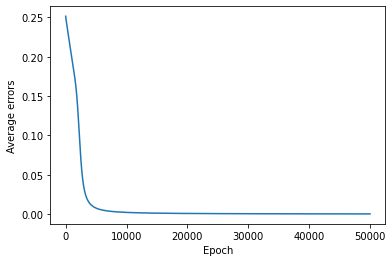

In [26]:
plt.plot(range(1, len(train_errors)+1), train_errors[::-1])

plt.xlabel('Epoch')
plt.ylabel('Average errors')

plt.show()